### **Segunda Parte**. En esta sección la idea es realizar regresión lineal en $\mathbb{R}^2$ y analizar como se comportan las soluciones obtenidas.


In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **1.**

**Usando los datos del archivo ejercicio_1.csv:**

In [223]:
data = pd.read_csv('ejercicio_1.csv', sep=',', header=0)

**a) Graficar todos los puntos en el plano $xy$.**

**Nota: La primer columna del archivo marca el valor de $x$ y la segunda el valor de $y$ de cada punto.**
**Recomendamos usar la biblioteca pandas para leer los archivos con la función read_csv.**

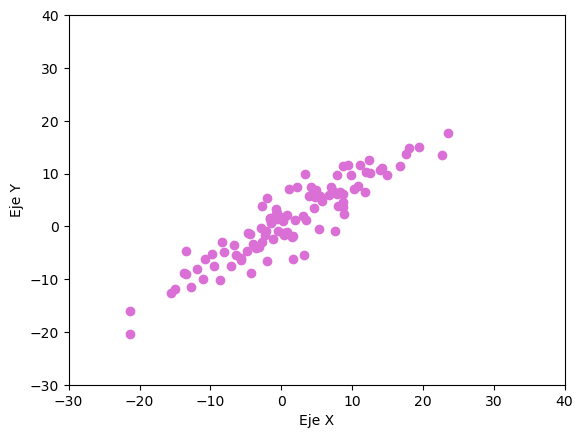

In [224]:
x = data.iloc[:,0]
y = data.iloc[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y, color="orchid")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")

ax.set_xlim(-30,40)
ax.set_ylim(-30,40)
plt.show()

**b) Utilizando los conceptos teóricos desarrollados en la primera parte, hallar la recta que mejor aproxima a los datos.**


Para obtener la pendiente de la recta de regresión, usamos la formula obtenida en el ejercicio 1.f: $$\beta^* = (X^T X)^{-1}X^T y$$

Luego graficamos la recta de regresión sobre el scatterplot:

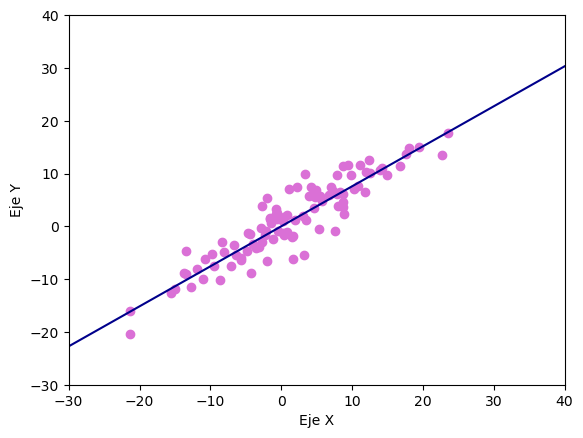

In [225]:
b = np.dot(np.dot(1/np.dot(np.transpose(x), x), np.transpose(x)), y)
x_i = np.linspace(-30, 40, 1000)

#recta de regresión 
y_i = b*x_i

ax.plot(x_i, y_i, color="darkblue")

plt.show()
fig

In [226]:
#Pendiente de la recta de regresión
b

0.7578541396785937

La recta que mejor aproxima los datos es: 

$y = \widehat{\beta} * x$

$y = 0.75785 * x$

**c) Realizar nuevamente los incisos (a) y (b) pero considerando los puntos**
$$\{(x_i, y_i + 12) \text{ con } i = 1\ldots n\}$$

**donde $(x_i, y_i)$ eran los puntos originales. ¿Es buena la aproximación realizada?, ¿cuál es el problema?**

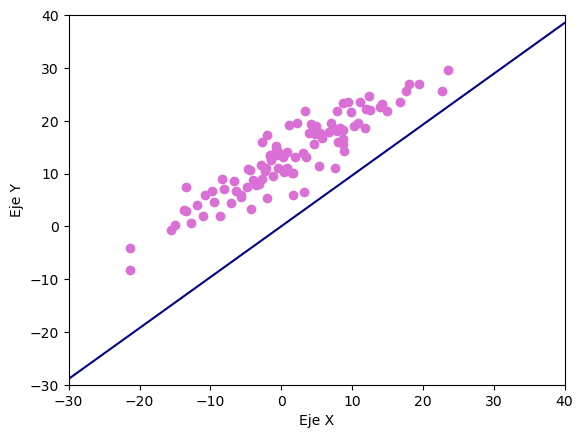

0.9633290275386616

In [227]:
x = data.iloc[:,0]
y_12 = data.iloc[:,1] + 12

fig2, ax2 = plt.subplots()
ax2.scatter(x, y_12, color="orchid")
ax2.set_xlabel("Eje X")
ax2.set_ylabel("Eje Y")

ax2.set_xlim(-30,40)
ax2.set_ylim(-30,40)

b = np.dot(np.dot(1/np.dot(np.transpose(x), x), np.transpose(x)), y_12)

x_i = np.linspace(-30, 40, 1000)

#recta de regresión 
y_i = b*x_i

ax2.plot(x_i, y_i, color="darkblue")

plt.show()
b

No, la aproximación realizada no es buena ya que un modelo lineal de la forma $ y = \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$ no ajusta datos si se le suma una constante a ellos, porque esta suma de constantes cambia la posición vertical de los datos lo que resulta en un desplazamiento de los puntos en el plano. 

Por lo tanto, la relación lineal entre las variables independientes  y la variable dependiente se mantiene, pero la ordenada al origen de la recta de regresión cambia, lo que significa que los valores estimados de $y$ estarán más alejados de los datos originales. 

**d) ¿Cómo se podría extender el modelo para poder aproximar cualquier recta en el plano?**

Para extender el modelo para poder aproximar cualquier recta en el plano, se puede agregar una variable adicional al modelo lineal que actúe como un termino constante. Entonces, la ecuación del modelo lineal sería $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$ donde $\beta_0$ es el coeficiente que representa la ordenada al origen. 
 
Generamos una nueva matriz que vive en $\mathbb{R}^{nx2}$ con la primer columna de unos y la segunda corresponde a las $x_i$ originales. 
\begin{pmatrix}
1 & x_1  \\
\vdots & \vdots  \\
1 & x_n 
\end{pmatrix}

Ademas, modificamos $\beta$ por un vector que vive en $\mathbb{R}^{2x1}$ en donde $\beta_0$ corresponde a la ordenada al origen y $\beta_1$ es el $\beta$ anterior.

\begin{pmatrix}
\beta_0  \\
\beta_1  
\end{pmatrix}

Concluimos que para extender el modelo se necesita resolver el siguiente sistema:

\begin{pmatrix}
y_1 \\
\vdots \\
y_n
\end{pmatrix} = \begin{pmatrix}
1 & x_1 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix} \begin{pmatrix}
\beta_0 \\
\beta_1
\end{pmatrix}



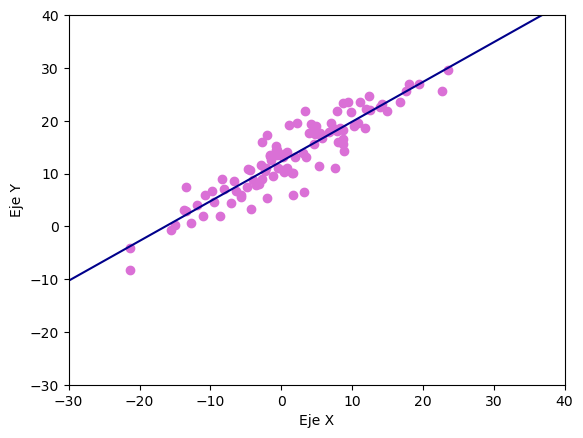

array([[12.28565184],
       [ 0.75296295]])

In [228]:
x_n = x.to_numpy().reshape((100,1))
y_n = y_12.to_numpy().reshape((100,1))

x_unos = np.ones((100,1),int)
x_new = np.hstack((x_unos, x_n))
x_new_t = np.transpose(x_new)

b_optimo = np.dot(np.linalg.inv(np.dot(x_new_t, x_new)), np.dot(x_new_t, y_n))

x_i = np.linspace(-30, 40, 1000)


plt.plot(x_i, x_i*b_optimo[1] + b_optimo[0], color="darkblue")
plt.scatter(x, y_12, color="orchid")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.xlim(-30,40)
plt.ylim(-30,40)

plt.show()
b_optimo

Ahora, la recta que mejor aproxima los datos es:

$y = \widehat{\beta}_0 + \widehat{\beta}_1 * x$ 

$y = 12.28565 + 0.75296295 * x$

#### **2.** 

**Usando los datos del archivo ejercicio_2.csv:**

In [229]:
data2 = pd.read_csv('ejercicio_2.csv', sep=',', header=0)

**a) Graficar y aproximar los puntos con una recta.**

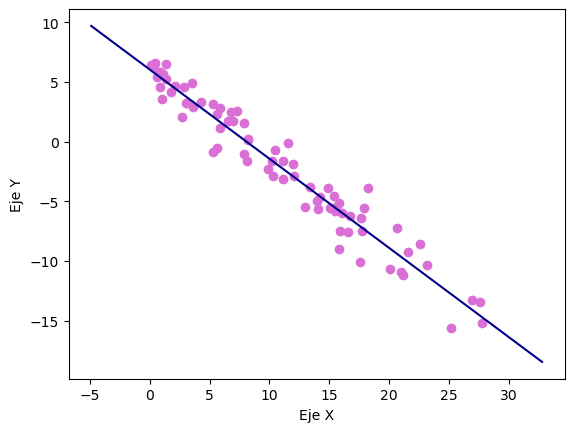

In [230]:
x_2 = data2.iloc[:,0]
y_2 = data2.iloc[:,1]

x_n2 = x_2.to_numpy().reshape((75,1))
y_n2 = y_2.to_numpy().reshape((75,1))

x_unos = np.ones((75,1),int)
x_new2 = np.hstack((x_unos, x_n2))
x_new2_t = np.transpose(x_new2)

b_optimo2 = np.dot(np.linalg.inv(np.dot(x_new2_t, x_new2)), np.dot(x_new2_t, y_n2))

x2_i = np.linspace(np.min(x_2) -5, np.max(x_2) + 5)

fig4, ax4 = plt.subplots()
ax4.plot(x2_i, x2_i*b_optimo2[1] + b_optimo2[0], color="darkblue")
ax4.scatter(x_2, y_2, color="orchid")
ax4.set_xlabel("Eje X")
ax4.set_ylabel("Eje Y")

plt.show()

**b) Imaginemos que los datos forman parte de mediciones de algún tipo, como por ejemplo la temperatura de un procesador a lo largo del tiempo), y queremos predecir cuál va a ser la temperatura en el futuro. ¿Es buena la aproximación que realizamos?, ¿cuál fue el problema en este caso?**

La aproximación realizada con el modelo lineal puede ser buena o mala, dependiendo de que representen los datos.
Si los datos muestran una relación lineal clara, entonces es probable que el modelo lineal proporcione una buena aproximación.

Sin embargo, si la relación entre el eje X y el eje Y no es lineal, el modelo lineal puede ser insuficiente para predecir datos futuros.  

Por ejemplo, en el caso de que los datos proporcionados representen la relación entre la temperatura y el tiempo, no podemos asegurar que la temperatura dependa unicamente del tiempo. Probablemente hayan más variables independientes que influyan sobre esta, como por ejemplo, la carga del procesador.
Por lo tanto, podrían existir otros modelos que aproximen mejor la variable dependiente a futuro. 

### **Tercera parte.** Regresion lineal en datos reales.

En esta sección utilizaremos el conjunto de datos provisto en Machine Learning Repository. Este consiste en
datos de ventas de 414 casas en Taiwan. La información provista por casa es (en orden):

i) La fecha en que se realizó la transacción. Expresada en formato 
$$\text{año } + \frac{\text{numero\_mes}}{12}$$

ii) La edad de la casa en años.

iii) La distancia a la estación de tren o subte más cercana en metros.

iv) La cantidad de almacenes alcanzables a pie.

v) La latitud en grados.

vi) La longitud en grados.

vii) El precio por Ping. La cual es una unidad utilizada en Taiwan que representa 3,3 metros cuadrados.

Vamos a dividir este conjunto de datos en dos:

i) _Datos de entrenamiento_: usamos los datos desde la observación 1 a la 315 inclusive.

ii) _Datos de test_: usamos los datos desde la observación 316 a la 414 inclusive.

**1. Teniendo en cuenta la teoría desarrollada en la primer parte del trabajo práctico y usando los datos de
entrenamiento:**

In [231]:
data_ventas = pd.read_csv('ventas_taiwan.csv', sep=',', header=0)

data_ent = data_ventas.iloc[:315,:]
data_test = data_ventas.iloc[315:,:]

**a) Estimar los parámetros $\widehat{\beta}$ que minimizan el error cuadrático medio para este problema.**

In [232]:
x_ent = (data_ent.iloc[:,1:7]).to_numpy().reshape((315,6))
y_ent = (data_ent.iloc[:,[7]]).to_numpy().reshape((315,1))

m_unos = np.ones((315,1),int)

x_new3 = np.hstack((m_unos, x_ent)) 
x_new3_t = np.transpose(x_new3)

b_est = np.dot(np.linalg.inv(np.dot(x_new3_t, x_new3)), np.dot(x_new3_t, y_ent))

b_est

array([[-1.48729480e+04],
       [ 4.96257468e+00],
       [-2.79853534e-01],
       [-4.29360382e-03],
       [ 1.11451659e+00],
       [ 2.63780784e+02],
       [-1.36639291e+01]])

**b) Encontrar $\widehat{y}$ la estimación de la variable de respuesta.**

Se necesita resolver el siguiente sistema:

\begin{pmatrix}
\widehat{y}_1 \\
\vdots \\
\widehat{y}_n
\end{pmatrix} = \begin{pmatrix}
1 & x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & x_{16} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} & x_{n3} & x_{n4} & x_{n5} & x_{n6}
\end{pmatrix} \begin{pmatrix}
\widehat{\beta}_0 \\
\vdots \\
\widehat{\beta}_6 \\
\end{pmatrix}

In [233]:
y_pred = np.dot(x_new3,b_est)

y_pred.shape

(315, 1)

**c) ¿Cuánto vale el error cuadrático medio?**

**Definimos error cuadrático medio como:**

$$ ECM(\widehat{y})= \frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{y}_i)^2 $$

**donde $y_i$ son observaciones de una variable y $\widehat{y}_i$ estimaciones de las mismas.**

In [234]:
ecm = np.sum((y_ent - y_pred)**2) * 1/len(data_ent)

ecm

83.16551901820323

**2. Utilizando los datos de test, analizar cuál es el error cuadrático medio al utilizar los parámetros $\widehat{\beta}$ estimados en el punto anterior.**

In [235]:
x_test = (data_test.iloc[:,1:7]).to_numpy().reshape((99,6))
y_test = (data_test.iloc[:,[7]]).to_numpy().reshape((99,1))

m_unos2 = np.ones((99,1),int)

x_new4 = np.hstack((m_unos2, x_test)) 
x_new4_t = np.transpose(x_new4)

y_pred2 = np.dot(x_new4,b_est)

ecm_test = np.sum((y_test - y_pred2)**2) * 1/99


ecm_test

58.66453832312004

**a) ¿Es la estimación mejor que sobre los datos originales?, ¿A que se debe la discrepancia?**

Sabemos que la diferencia entre la predicción y el valor real es el error, es decir, cuanto menor sea esta diferencia, mejor va a ser el ajuste. Por lo tanto, podemos asegurar que la estimación sobre los datos de test es mejor que sobre los datos de entrenamiento porque el ECM es menor. En otra palabras, los datos de entrenamiento están más alejados de la aproximación que los datos de test. 

**b) ¿Qué sucede con el ECM del segundo conjunto de casas si se realiza la regresión sobre todos los datos al mismo tiempo (es decir, las 414 casas)?**

In [236]:
x_ventas = (data_ventas.iloc[:,1:7]).to_numpy().reshape((414,6))
y_ventas = (data_ventas.iloc[:,[7]]).to_numpy().reshape((414,1))

m_unos3 = np.ones((414,1),int)

x_new5 = np.hstack((m_unos3, x_ventas)) 
x_new5_t = np.transpose(x_new5)

# b_ventas = np.dot(np.linalg.inv(np.dot(x_new5_t, x_new5)), np.dot(x_new5_t, y_ventas))
# y_pred_ventas = np.dot(x_new4,b_ventas)
# ecm_ventas = np.sum((y_test - y_pred_ventas)**2) * 1/99

y_pred_ventas = np.dot(x_new5,b_est)
ecm_ventas = np.sum((y_ventas - y_pred_ventas)**2) * 1/414

ecm_ventas

77.30658885198768

Si se realiza la regresión sobre todos los datos al mismo tiempo, 

es razonable que el ECM total aumente en relacion al obtenido a partir de los datos de test. Esto se debe a que al agregar los datos de entrenamiento,

Si se realiza la regresión sobre todos los datos al mismo tiempo, es razonable que el ECM total aumente en relación al obtenido a partir de los datos de test. Esto se debe a que al agregar los datos de entrenamiento, estamos agregando puntos más dispersos que los de test (por lo dicho anteriormente respecto del ECM). Por lo tanto, el ECM de todos los datos juntos debería ser menor que el ECM de entrenamiento pero mayor que el ECM de test. 

**3. Graficar el error cometido por cada casa. Es decir el valor absoluto de la diferencia entre el precio por Ping real y el estimado.**

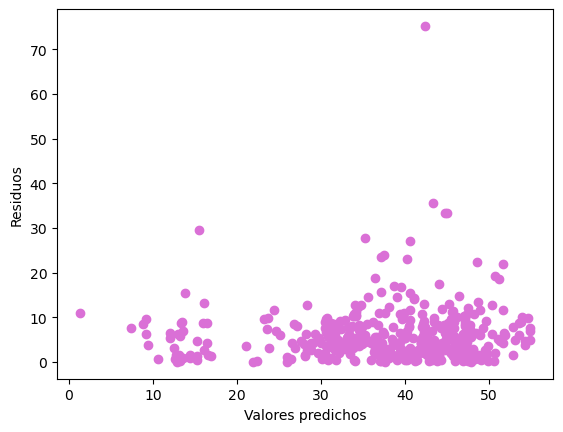

In [237]:
b_total = np.dot(np.linalg.inv(np.dot(x_new5_t, x_new5)), np.dot(x_new5_t, y_ventas))
y_pred_total = np.dot(x_new5,b_total)


plt.scatter(y_pred_total,abs(y_ventas - y_pred_total), color = 'orchid')
plt.ylabel("Residuos")
plt.xlabel("Valores predichos")

plt.show()

A partir del grafico, notamos que el modelo ajusta bien los datos ya que los residuos estan distribuidos aleatoramiente en torno al eje X. 

**4. Imaginemos que se agrega una nueva columna a los datos que informa el año en que la misma fue construida. ¿Disminuiría esto el ECM?**

Si realizamos una regresion lineal simple con el año de construcción y el precio de venta, notaremos que entre estas dos variables la relación es debil, es decir, el precio de venta esta debilmente relacionado con el año de construcción de la casa. 

Sin embargo, el año de construcción está correlacionada con la antigüedad de la casa. Por lo tanto, al realizar la regresión múltiple con la nueva variable notaremos que el ECM aumenta respecto de el ECM original, ya que estaríamos agregando una variable independiente poco relacionada con el precio, lo que generaría que más puntos esten más dispersos y más alejados de la aproximación.  

In [238]:
anio_construccion = (np.subtract(data_ventas["X1 transaction date"],data_ventas["X2 house age"])).to_numpy().reshape((414,1))

m_unos4 = np.ones((414,1),int)

x_ventas2 = np.hstack((m_unos4, x_ventas, anio_construccion)) 
x_ventas2_t = np.transpose(x_ventas2)

b_ventas2 = np.dot(np.linalg.inv(np.dot(x_ventas2_t, x_ventas2)), np.dot(x_ventas2_t, y_ventas))

y_pred_ventas2 = np.dot(x_ventas2,b_ventas2)

ecm_ventas2 = np.sum((y_ventas - y_pred_ventas2)**2) * 1/414

b_ventas2, ecm_ventas2,x_ventas2.shape

(array([[-1.44166564e+04],
        [-1.01242676e+01],
        [ 1.49697266e+01],
        [-4.48746137e-03],
        [ 1.13327690e+00],
        [ 2.25472973e+02],
        [-1.24236289e+01],
        [ 1.52526855e+01]]),
 321.98881418643515,
 (414, 8))